# 常见函数 

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

## `make_blobs` function
**parameter**  
*n_samples*  
int or array-like, optional (default=100)
If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

Changed in version v0.20: one can now pass an array-like to the n_samples parameter

*n_features*  
int, optional (default=2)  
The number of features for each sample.

*centers*  
int or array of shape \[n_centers, n_features\], optional (default=None)   
The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

*cluster_std*  
float or sequence of floats, optional (default=1.0)  
The standard deviation of the clusters.

*center_box*  
pair of floats (min, max), optional (default=(-10.0, 10.0))  
The bounding box for each cluster center when centers are generated at random.

*shuffle*  
boolean, optional (default=True)  
Shuffle the samples.

*random_state*  
int, RandomState instance, default=None  
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

*return_centers*  
bool, optional (default=False)  
If True, then return the centers of each cluster

**Returns**  
*Xarray of shape* \[n_samples, n_features\]  
The generated samples.

*yarray of shape* \[n_samples\]  
The integer labels for cluster membership of each sample.

*centers array, shape*  \[n_centers, n_features\]  
The centers of each cluster. Only returned if return_centers=True.

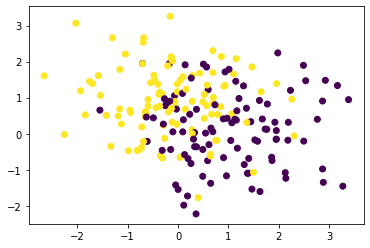

In [4]:
x1, y1 = datasets.make_blobs(n_features=2, n_samples=(
    100, 100), centers=[(1, 0), (0, 1)], random_state=0, cluster_std=[1.0, 1.0])
plt.scatter(x1[:,0], x1[:,1], c=y1)

In [8]:
final_set, final_class = x1, y1
for i in range(20):
    if np.random.randint(10) < 1:
        add_point, add_point_class = datasets.make_gaussian_quantiles(n_samples=5,
                                                     n_features=2, 
                                                     mean=(x1[i,0],x1[i,1]), 
                                                     cov=0.2,
                                                     random_state=0,
                                                    n_classes=2)
        final_set = np.append(final_set, add_point, axis=0)
        final_class = np.append(final_class, add_point_class, axis=0)
final_set.shape

(215, 2)

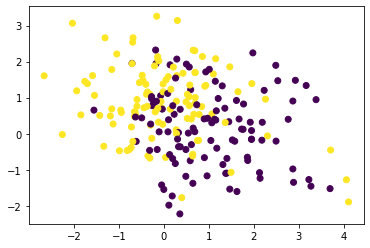

In [9]:
plt.scatter(final_set[:,0], final_set[:,1], c=final_class)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
model1 = LinearRegression()
model2 = KNeighborsClassifier(n_neighbors=2)
res1 =  model1.fit(x1, y1)
res2 = model2.fit(x1, y1)
res1.score(final_set, final_class), res2.score(final_set, final_class), res1.score(x1, y1), res2.score(x1,y1)

(0.19285501409735162, 0.813953488372093, 0.3128889007202321, 0.835)

## `make_gaussian_quantiles` function  
**Parameters**  
*mean*  
array of shape \[n_features\], optional (default=None)  
The mean of the multi-dimensional normal distribution. If None then use the origin (0, 0, …).

*cov*  
float, optional (default=1.)  
The covariance matrix will be this value times the unit matrix. This dataset only produces symmetric normal distributions.

*n_samples*  
int, optional (default=100)  
The total number of points equally divided among classes.

*n_features*  
int, optional (default=2)  
The number of features for each sample.

*n_classes*  
int, optional (default=3)  
The number of classes

*shuffle*  
boolean, optional (default=True)  
Shuffle the samples.

*random_state*  
int, RandomState instance, default=None  
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

**Returns**  
X  
array of shape \[n_samples, n_features\]  
The generated samples.

y  
array of shape \[n_samples\]
The integer labels for quantile membership of each sample.

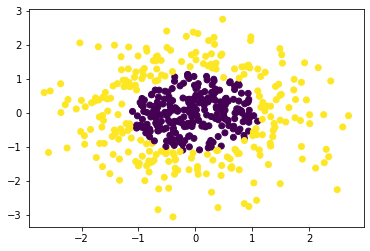

In [15]:
x2, y2 = datasets.make_gaussian_quantiles(n_samples=500,
                                          n_features=2,
                                          mean=(0, 0),
                                          cov=1,
                                          random_state=0,
                                          n_classes=2)
plt.scatter(x2[:, 0], x2[:, 1], c=y2)

## `make_classification` function  
**parameter**  
*n_samples*  
int, optional (default=100)
The number of samples.

*n_features*  
int, optional (default=20)
The total number of features. These comprise n_informative informative features, n_redundant redundant features,n_repeated duplicated features and n_features-n_informative-n_redundant-n_repeated useless features drawn at random.

*n_informative*  
int, optional (default=2)  
The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.

*n_redundant*  
int, optional (default=2)  
The number of redundant features. These features are generated as random linear combinations of the informative features.

*n_repeated*  
int, optional (default=0)  
The number of duplicated features, drawn randomly from the informative and the redundant features.  

*n_classes*  
int, optional (default=2)  
The number of classes (or labels) of the classification problem.

*n_clusters_per_class*  
int, optional (default=2)  
The number of clusters per class.

*weights*  
array-like of shape (n_classes,) or (n_classes - 1,), (default=None)  
The proportions of samples assigned to each class. If None, then classes are balanced. Note that if len(weights) == n_classes - 1, then the last class weight is automatically inferred. More than n_samples samples may be returned if the sum of weights exceeds 1.

*flip_y*  
float, optional (default=0.01)  
The fraction of samples whose class is assigned randomly. Larger values introduce noise in the labels and make the classification task harder. Note that the default setting flip_y > 0 might lead to less than n_classes in y in some cases.

*class_sep*  
float, optional (default=1.0)  
The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.

*hypercube*  
boolean, optional (default=True)  
If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.

*shift*  
float, array of shape \[n_features\] or None, optional (default=0.0)  
Shift features by the specified value. If None, then features are shifted by a random value drawn in \[-class_sep, class_sep\].

*scale*  
float, array of shape \[n_features\] or None, optional (default=1.0)  
Multiply features by the specified value. If None, then features are scaled by a random value drawn in \[1, 100\]. Note that scaling happens after shifting.

*shuffle*  
boolean, optional (default=True)  
Shuffle the samples and the features.

*random_state*  
int, RandomState instance, default=None  
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

**Returns**  
X  
array of shape \[n_samples, n_features\]  
The generated samples.

y  
array of shape \[n_samples\]  
The integer labels for class membership of each sample.